<a href="https://colab.research.google.com/github/FeedingDejaj/MAT422/blob/main/2_4_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4 Maximum Likelihood Estimation

By Abdula Alkhafaji with help from Generative AI for examples.

We will explore the concept of **Maximum Likelihood Estimation (MLE)**, an important method in statistics and data science for estimating parameters of a probability distribution. We will also see its application in **random samples** and **linear regression**.

## 2.4.1 MLE for Random Samples

**Maximum Likelihood Estimation (MLE)** is a statistical technique used to find the parameter values that maximize the likelihood function for a given set of observations. The likelihood function represents the probability of observing the data given the parameters.

### Steps:
1. Define the probability density function (PDF) or probability mass function (PMF).
2. Write the likelihood function as the product of the probabilities for each data point.
3. Take the natural logarithm of the likelihood function to simplify calculations (log-likelihood).
4. Differentiate the log-likelihood function with respect to the parameter.
5. Solve for the parameter value that maximizes the log-likelihood.

Let's demonstrate this with an example.

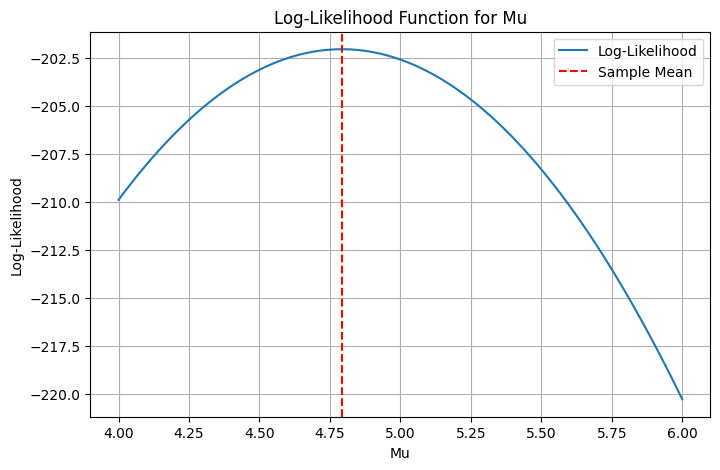

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)
data = np.random.normal(loc=5, scale=2, size=100)

def likelihood(mu, sigma, data):
    return np.prod(norm.pdf(data, loc=mu, scale=sigma))


def log_likelihood(mu, sigma, data):
    return np.sum(norm.logpdf(data, loc=mu, scale=sigma))


mu_values = np.linspace(4, 6, 100)
log_likelihood_values = [log_likelihood(mu, 2, data) for mu in mu_values]

plt.figure(figsize=(8, 5))
plt.plot(mu_values, log_likelihood_values, label='Log-Likelihood')
plt.axvline(data.mean(), color='red', linestyle='--', label='Sample Mean')
plt.title('Log-Likelihood Function for Mu')
plt.xlabel('Mu')
plt.ylabel('Log-Likelihood')
plt.legend()
plt.grid()
plt.show()

## 2.4.2 Linear Regression

**Linear Regression** is a predictive modeling technique where we aim to model the relationship between a dependent variable (response) and one or more independent variables (features). Using MLE, we can estimate the parameters (intercept and slope) that maximize the likelihood function for the given data.

The likelihood function assumes the residuals (errors) follow a normal distribution. This assumption allows us to use MLE to estimate the coefficients.

### Steps:
1. Define the regression model: y = β0 ​+ β1​x + ϵ
2. Use the likelihood function for  to estimate beta 1, beta 2, and epsilon.

Let's demonstrate this with a simple dataset.


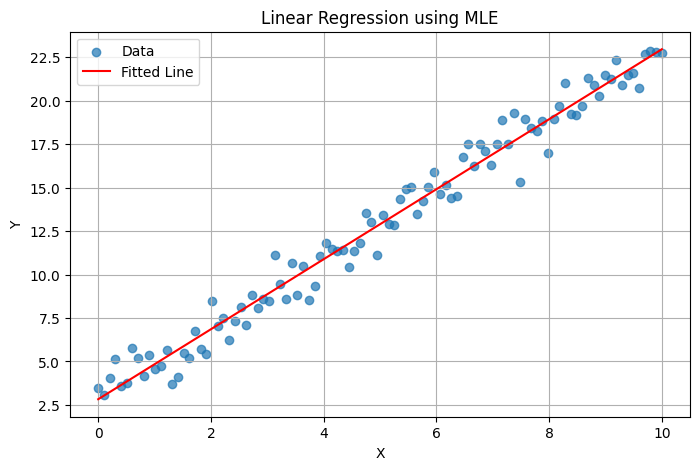

In [3]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 3 + 2 * x + np.random.normal(scale=1, size=len(x))


X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
params = model.params


plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Data', alpha=0.7)
plt.plot(x, params[0] + params[1] * x, color='red', label='Fitted Line')
plt.title('Linear Regression using MLE')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()
